# Linear Regression Model to analyze clothing shop efficiency

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data.
Imports



## Import the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtain the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions;
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


#### Read in the Ecommerce Customers csv file as a DataFrame called Customers.

In [2]:
Customers = pd.read_csv('Ecommerce Customers')

#### Check the head of Customers, and check out its info() and describe() methods.

In [3]:
Customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
Customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

#### Let's explore the numerical data of the csv file.


Let's use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

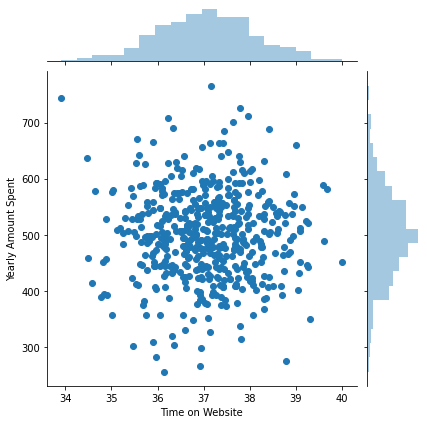

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=Customers)

Do the same but with the Time on App column instead.

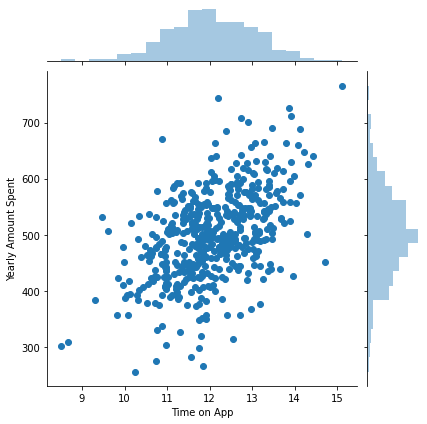

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=Customers)

Let's use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

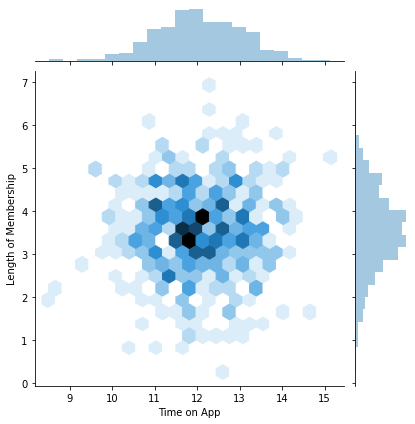

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data=Customers, kind='hex')

Let's explore these types of relationships across the entire data set. Use pairplot to recreate multiple plots.

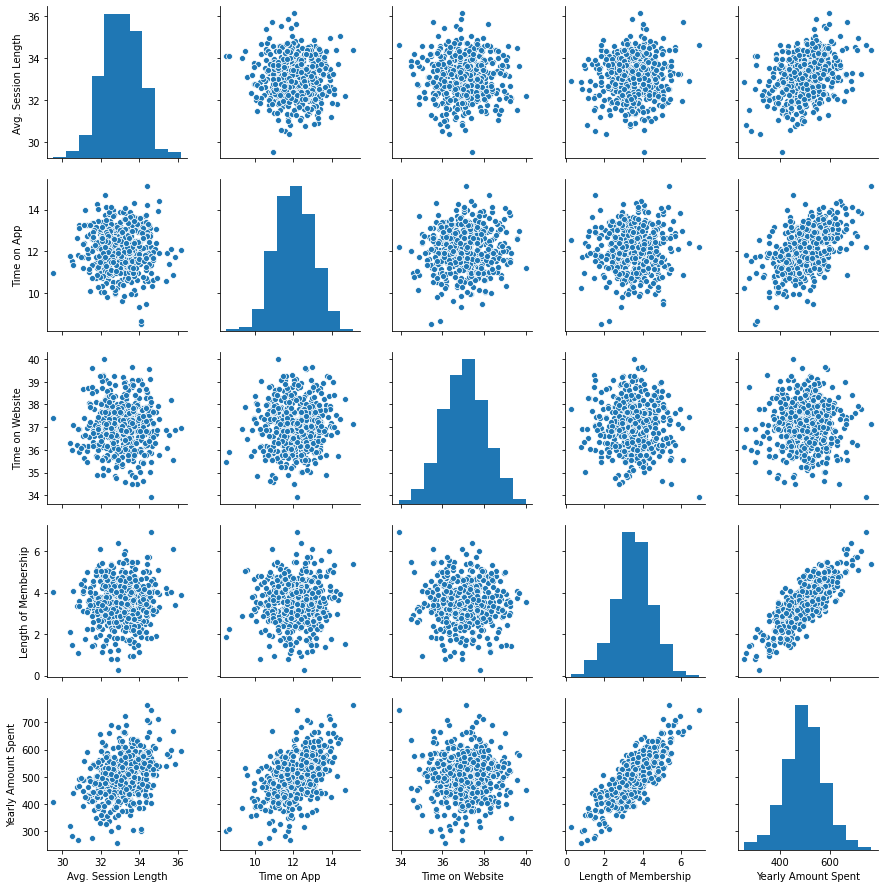

In [9]:
sns.pairplot(Customers)

#### As we can see, there are some linear correlation between certain columns. Based on this plot we can see that what appears to be the characteristic mostly correlated with the Yearly Amount Spent is the Length of Membership. This can also be seen on the tableof correlations between the variables shown below.

In [10]:
Customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Let's create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

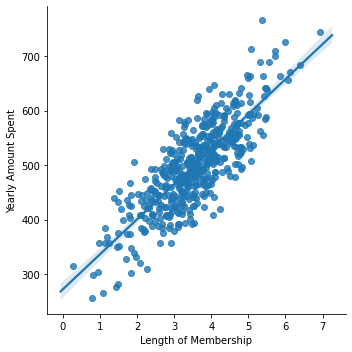

In [11]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=Customers)

## Training and Testing the Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable Y equal to the "Yearly Amount Spent" column. 

In [12]:
X = Customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [13]:
Y = Customers['Yearly Amount Spent']

In [14]:
X.shape

(500, 4)

In [15]:
Y.shape

(500,)

In [16]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


Let's use model_selection.train_test_split from sklearn to split the data into training and testing sets. We will set test_size=0.3 and random_state=101.


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [19]:
X_test.shape[0]

150

In [20]:
X_train.shape[0]

350

In [21]:
Y_test.shape[0]

150

In [22]:
Y_train.shape[0]

350

## Training the Model

#### Now its time to train our model on our training data!

Import LinearRegression from sklearn.linear_model.

In [23]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named LM. 

In [24]:
LM = LinearRegression()

Let's train and fit LM on the training data.

In [26]:
LM.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's print out the coefficients of the model

In [27]:
print('Coefficients: \n', LM.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

#### Now that we have fit our model, let's evaluate its performance by predicting off the test values! 

Use LM.predict () to predict off the X_test set of the data.

In [28]:
Predict = LM.predict(X_test)

Now let's create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

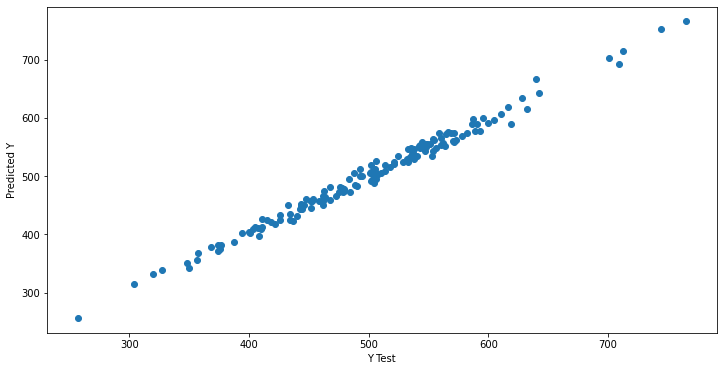

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Yearly Amount Spent')

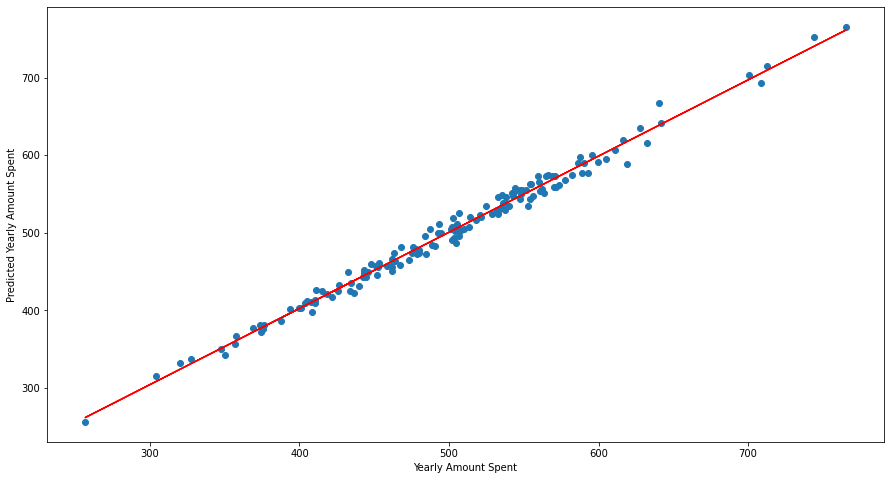

In [40]:
fig = plt.figure(figsize=(15,8))

m = (Y_test.dot(Predict) - Predict.mean()* Y_test.sum()) / (Y_test.dot(Y_test) - Y_test.mean()*Y_test.sum())
b = (Predict.mean() * Y_test.dot(Y_test) - Y_test.mean() * Y_test.dot(Predict)) / (Y_test.dot(Y_test) - Y_test.mean()*Y_test.sum())
Y_fit = m*Y_test + b
plt.scatter(Y_test, Predict)
plt.plot(Y_test, Y_fit, 'red')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')

Text(0, 0.5, 'Y_test / Predict')

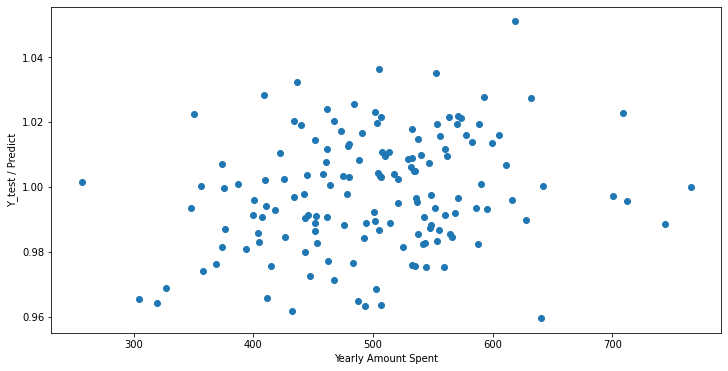

In [41]:
# Let's see the ratio between (Yearly Amount Spent)_test and Predict

plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_test/ Predict)
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Y_test / Predict')

## Evaluating the Model

#### Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Predict))
print('Square Root of Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Predict)))

Mean Absolute Error: 7.22814865343083
Mean Squared Error: 79.8130516509746
Square Root of Mean Squared Error: 8.933815066978642


## Residuals

#### You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. 

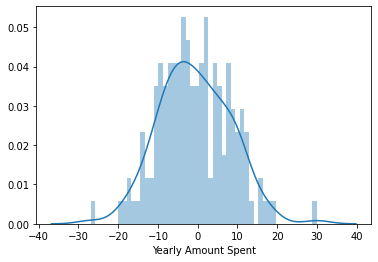

In [37]:
sns.distplot(Y_test - Predict, bins=50)

#### As we can see, the residues are well distributed around 0 and with no long tail, so the model is approved.

## Conclusion

#### We still want to figure out the answer to the original question, which is: do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

Let's recreate the table of coefficients

In [38]:
coeff_DF = pd.DataFrame(LM.coef_, X.columns, columns=['Coefficient'])
coeff_DF

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### How can you interpret these coefficients?


Interpretation of the coefficients:

* Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.

* Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.

* Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.

* Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

#### Do you think the company should focus more on their mobile app or on their website?

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


## Great Job!

### Congrats on your contract work! The company loved the insights!